# Nlp1


In [ ]:
pip install scikit-learn==0.24.2

In [85]:
!pip install nltk

In [143]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn .naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from PIL import Image
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as pcf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']
vect = CountVectorizer()
vect.fit(simple_train)
# Remplacez get_feature_names() par get_feature_names_out()
features = vect.get_feature_names_out()
print(features)

['cab' 'call' 'me' 'please' 'tonight' 'you']


In [35]:
#transform training data into a matrix
simple_train_data=vect.transform(simple_train)
simple_train_data.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [37]:
pd.DataFrame(simple_train_data.toarray(),columns=vect.get_feature_names_out())


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [38]:
print(simple_train_data)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


# Nlp2

In [40]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv',encoding="latin-1")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [43]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


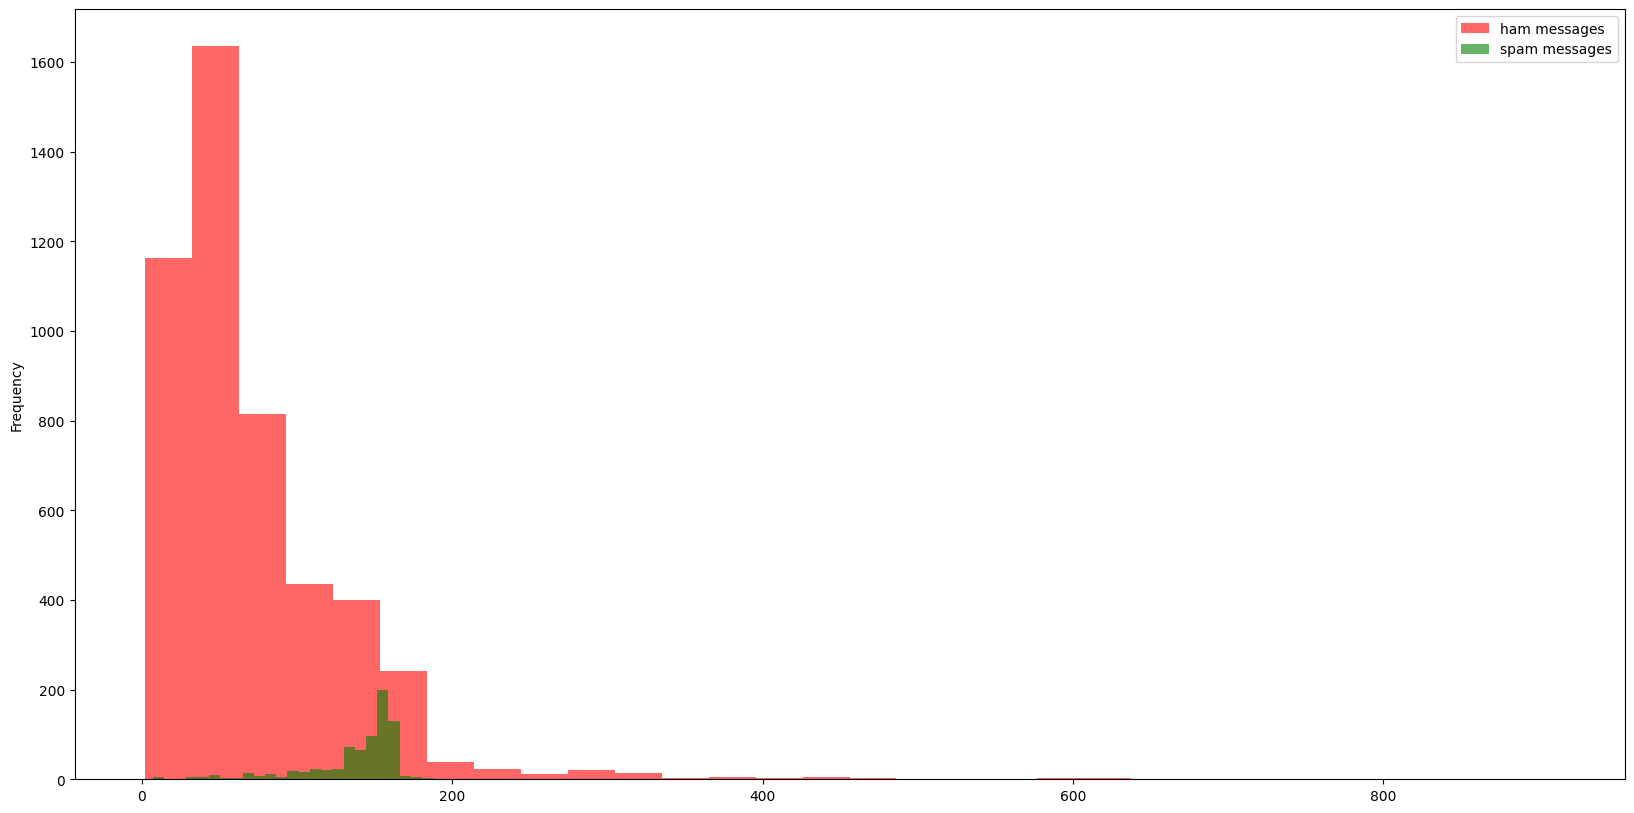

In [46]:
df['message_len']=df.Message.apply(len)
plt.figure(figsize=(20,10))
df[df.Category == "ham"].message_len.plot(bins=30,kind='hist',color="red",label='ham messages',alpha=0.6)
df[df.Category == "spam"].message_len.plot(bins=30,kind='hist',color="green",label='spam messages',alpha=0.6)
plt.legend();

In [47]:
df[df.Category =="spam"].describe()

,message_len
count,747.000000
mean,138.432396
std,30.105608
min,7.000000
25%,133.000000
50%,149.000000
75%,157.000000
max,224.000000


In [48]:
df[df.Category =="ham"].describe()

,message_len
count,4825.000000
mean,71.524767
std,58.453847
min,2.000000
25%,33.000000
50%,52.000000
75%,93.000000
max,910.000000


In [51]:
df["label_num"]=df.Category.map({'ham':0,"spam":1})

In [54]:
X = df.Message
Y = df.label_num
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,random_state=3)

In [55]:
vect=CountVectorizer()
vect.fit(X_train)
X_train_data=vect.transform(X_train)
X_train_data=vect.fit_transform(X_train)
X_test_data=vect.transform(X_test)

In [62]:
pd.DataFrame(X_test_data.toarray(),columns=vect.get_feature_names_out()).tail(5)

,00,000,000pes,008704050406,0089,0121,01223585236,0125698789,02,0207,...,zed,zeros,zindgi,zoe,zogtorius,zoom,zouk,zyada,ãº1,ã¼
1388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
tf_transformer=TfidfTransformer()
tf_transformer.fit(X_train_data)
tf_transformer.transform(X_train_data)

<4179x7460 sparse matrix of type '<class 'numpy.float64'>'
	with 55474 stored elements in Compressed Sparse Row format>

In [66]:
from sklearn .naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(X_train_data,Y_train)

CPU times: user 7.16 ms, sys: 0 ns, total: 7.16 ms
Wall time: 20.9 ms


MultinomialNB()

In [67]:
y_pred_class=nb.predict(X_test_data)
y_pred_class

array([1, 0, 1, ..., 0, 0, 0])

In [69]:
metrics.accuracy_score(Y_test,y_pred_class)

0.9877961234745154

In [70]:
metrics.confusion_matrix(Y_test,y_pred_class)

array([[1194,    3],
       [  14,  182]])

In [71]:
X_test[y_pred_class>Y_test]

,Message
4382,Mathews or tait or edwards or anderson
1082,Can u get pic msgs to your phone?
1260,We have sent JD for Customer Service cum Accou...


In [72]:
X_test[y_pred_class < Y_test]

,Message
1269,Can U get 2 phone NOW? I wanna chat 2 set up m...
955,Filthy stories and GIRLS waiting for your
3302,RCT' THNQ Adrian for U text. Rgds Vatian
4298,thesmszone.com lets you send free anonymous an...
5427,Santa Calling! Would your little ones like a c...
3530,Xmas & New Years Eve tickets are now on sale f...
2402,Babe: U want me dont u baby! Im nasty and have...
2823,ROMCAPspam Everyone around should be respondin...
869,Hello. We need some posh birds and chaps to us...
1638,"0A$NETWORKS allow companies to bill for SMS, s..."


In [73]:
y_pred_prob=nb.predict_proba(X_test_data)[:,1]
y_pred_prob

array([1.00000000e+00, 7.79199266e-10, 1.00000000e+00, ...,
       1.01200364e-17, 1.66180960e-03, 2.66507155e-06])

In [74]:
metrics.roc_auc_score(Y_test,y_pred_prob)

0.9783941145380458

In [78]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [81]:
y_pred= pipe.predict(X_test)
metrics.accuracy_score(Y_test,y_pred)

0.9519023689877961

In [82]:
metrics.confusion_matrix(Y_test,y_pred)

array([[1197,    0],
       [  67,  129]])

# Nlp3

In [84]:
def clean_text(text):
    '''remove links,remove punctuation and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df["Message_clean"]=df['Message'].apply(clean_text)
df.tail(5)

,Category,Message,message_len,label_num,Message_clean
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1,this is the time we have tried contact u u h...
5568,ham,Will Ã¼ b going to esplanade fr home?,37,0,will ã¼ b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0,pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,125,0,the guy did some bitching but i acted like id ...
5571,ham,Rofl. Its true to its name,26,0,rofl its true to its name


In [99]:
stop_words = stopwords.words("english")
def rmv_stopwords(text):
  text=" ".join(word for word in text.split(' ') if word not in stop_words)
  return text

In [100]:
df["Message_clean"]=df['Message_clean'].apply(rmv_stopwords)

In [101]:
df.tail(5)

,Category,Message,message_len,label_num,Message_clean
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1,time tried contact u u â£ pound prize claim...
5568,ham,Will Ã¼ b going to esplanade fr home?,37,0,ã¼ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0,pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,125,0,guy bitching acted like id interested buying s...
5571,ham,Rofl. Its true to its name,26,0,rofl true name


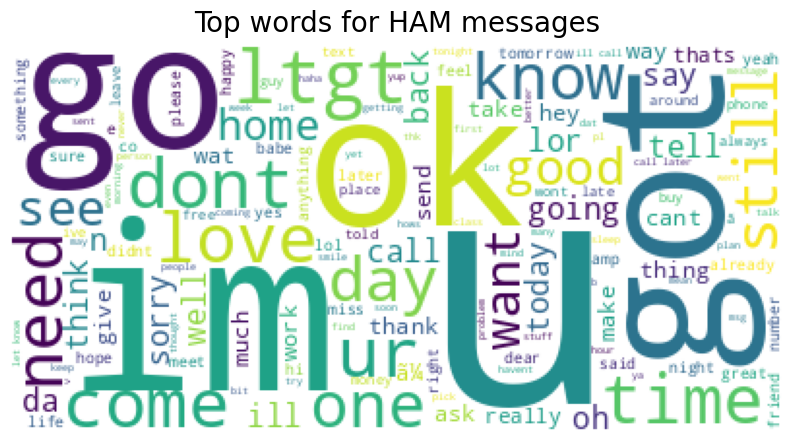

In [115]:
ue = WordCloud(background_color="white",max_words=300)
ue.generate(' '.join(text for text in df.loc[df['Category'] == 'ham', 'Message_clean']))
plt.figure(figsize=(10,10))
plt.title('Top words for HAM messages',
          fontdict={'size': 20,  'verticalalignment': 'bottom'})
plt.imshow(ue)
plt.axis("off")
plt.show()

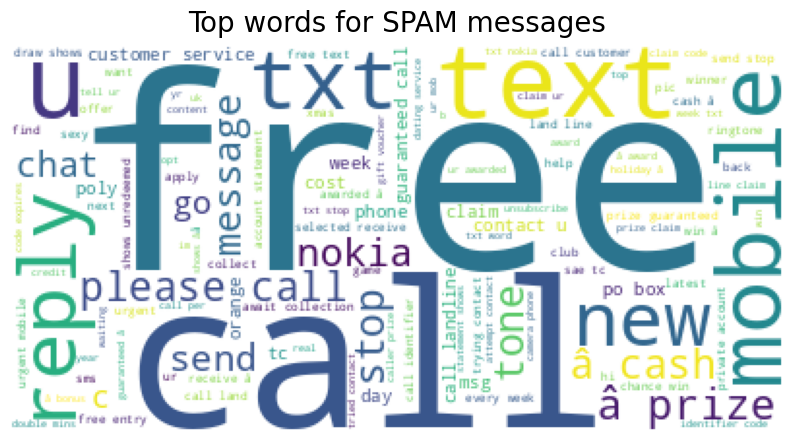

In [116]:
ue = WordCloud(background_color="white",max_words=300)
ue.generate(' '.join(text for text in df.loc[df['Category'] == 'spam', 'Message_clean']))
plt.figure(figsize=(10,10))
plt.title('Top words for SPAM messages',
          fontdict={'size': 20,  'verticalalignment': 'bottom'})
plt.imshow(ue)
plt.axis("off")
plt.show()

# Nlp 4

In [118]:
data=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')
data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [121]:
data["Review"][3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [124]:
re.sub('[^a-zA-Z]',' ',data['Review'][3]).lower().split()

['stopped',
 'by',
 'during',
 'the',
 'late',
 'may',
 'bank',
 'holiday',
 'off',
 'rick',
 'steve',
 'recommendation',
 'and',
 'loved',
 'it']

In [125]:
ps=PorterStemmer
cleanReview=[]
for i in range (0,data.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()  #Stemming:  Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
    all_stopword=stopwords.words('english')
    all_stopword.remove('not') #this will remove 'not from stopwords as it is requried for negative review'
    review=[ps.stem(word) for word in review if not word in set(all_stopword)]
    review=' '.join(review)
    cleanReview.append(review)

In [129]:
cleanReview[10:30]

['servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi']

In [130]:
dff = CountVectorizer()
x = dff.fit_transform(cleanReview).toarray()
y  = data.iloc[:,-1].values

In [133]:
data1 = pd.DataFrame(x,columns=dff.get_feature_names_out())

In [136]:
data1.shape

(1000, 1566)

In [137]:
data1.tail(5)

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


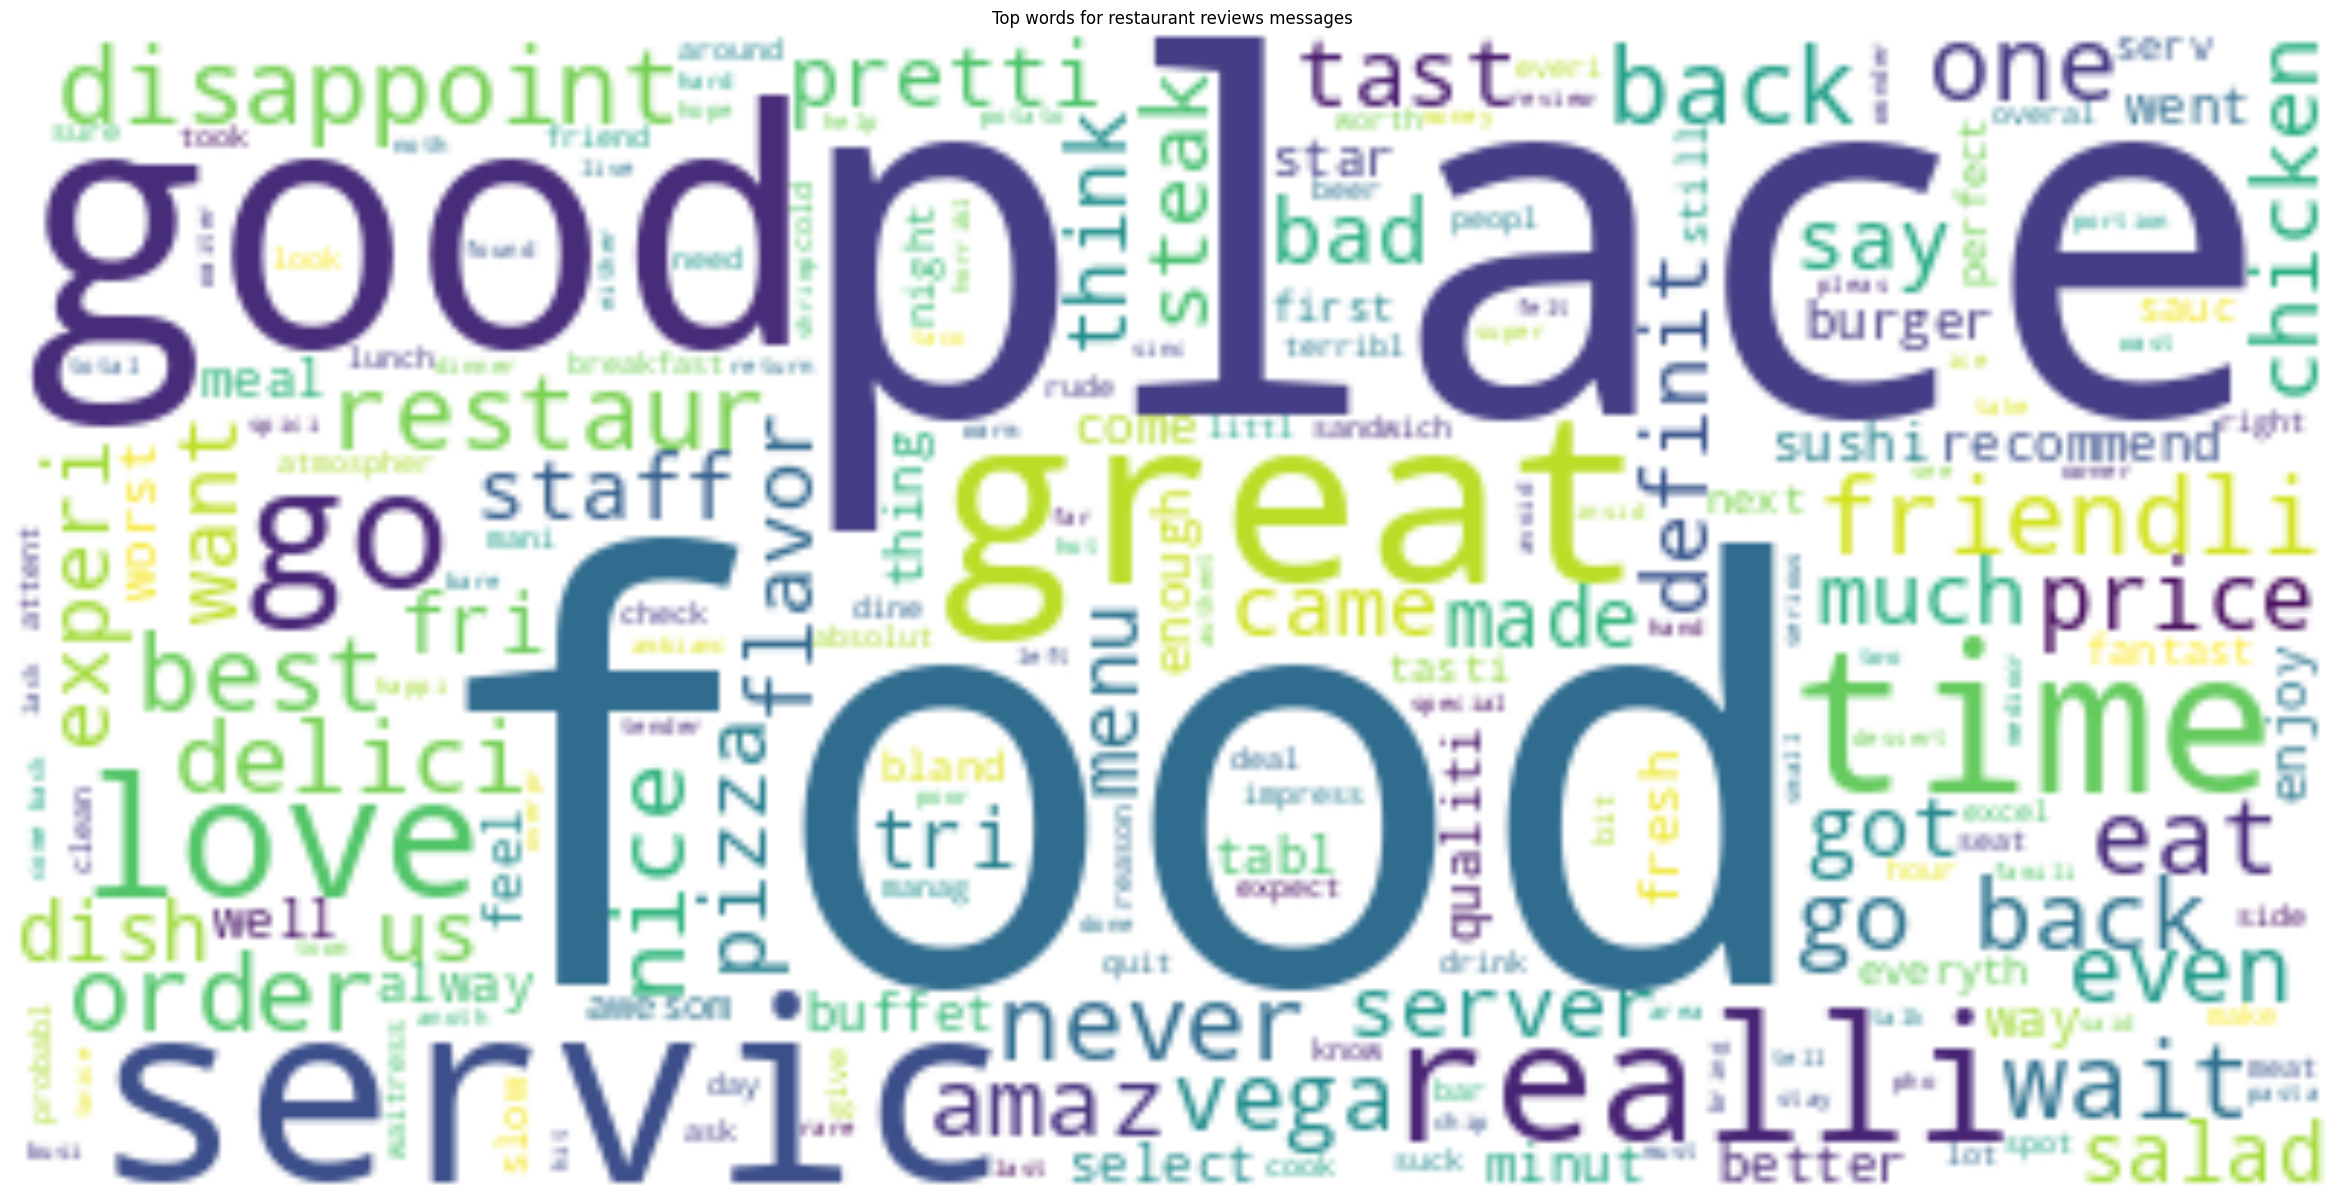

In [158]:
ue = WordCloud(background_color="white",max_words=300,max_font_size=100)
ue.generate(' '.join(text for text in cleanReview))
plt.figure(figsize=(30,30))
plt.title('Top words for restaurant reviews messages')
plt.imshow(ue,interpolation='bilinear')
plt.axis("off")
plt.show()

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((800, 1566), (200, 1566))

In [141]:
GA=GaussianNB()
GA.fit(x_train,y_train)
y_pred=GA.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

In [142]:
accuracy_score(y_test,y_pred)

0.73

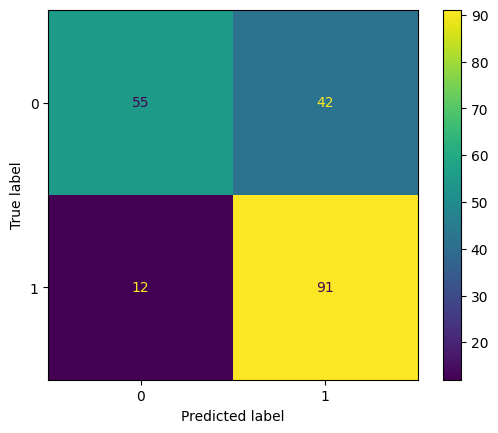

In [144]:
cm = confusion_matrix(y_test, y_pred, labels=GA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=GA.classes_)
disp.plot()
plt.show()

In [145]:
classifier=pcf(n_estimators=50,max_depth=5,oob_score=True,n_jobs=-1,random_state=0)
classifier.fit(x_train,y_train)
y_pred1=classifier.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

In [146]:
accuracy_score(y_test,y_pred1)

0.77

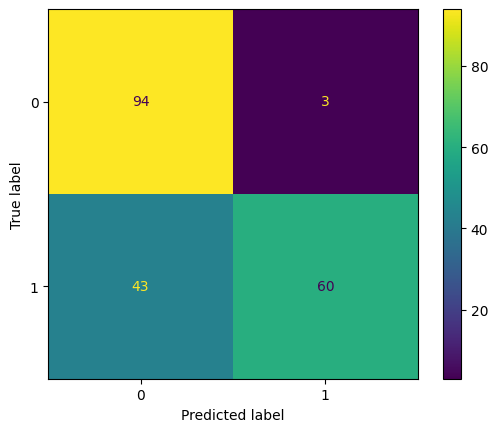

In [147]:
cm = confusion_matrix(y_test, y_pred1, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()

In [171]:
print(len((list(set(stopwords.words("arabic"))))))
print(len((list(set(stopwords.words("french"))))))
print(len((list(set(stopwords.words("english"))))))
print(len((list(set(stopwords.words("spanish"))))))
print(len((list(set(stopwords.words("italian"))))))
print(len((list(set(stopwords.words("german"))))))

701
157
179
313
279
232
